## Average Correct Rate of Control & CASK Groups by Active Poke Under Flipping Condition

In [1]:
import sys
sys.path.insert(0, '../scripts')

from accuracy import count_error_rate, draw_left_right_error, draw_mean_error_rate, graph_cumulative_acc
from preprocessing import read_csv_clean, calculate_accuracy_by_row

import paths
import intervals as invs
from preprocessing import read_csv_clean

In [2]:
ctrl_ending_corr = []
exp_ending_corr = []

def read_and_record(path:str, ending_corr:list, dict_corr:list):
    df = read_csv_clean(path, cumulative_accuracy=True, convert_large=True)
    value = df['Percent_Correct'].tail(1).values[0]
    ending_corr.append(value)
    return df

In [3]:
ctrl_list = []
exp_list = []

for path in paths.contigency_flip_ctrl:
    ctrl_list.append(read_and_record(path, ctrl_ending_corr, None))
for path in paths.contigency_flip_cask:
    exp_list.append(read_and_record(path, exp_ending_corr, None))

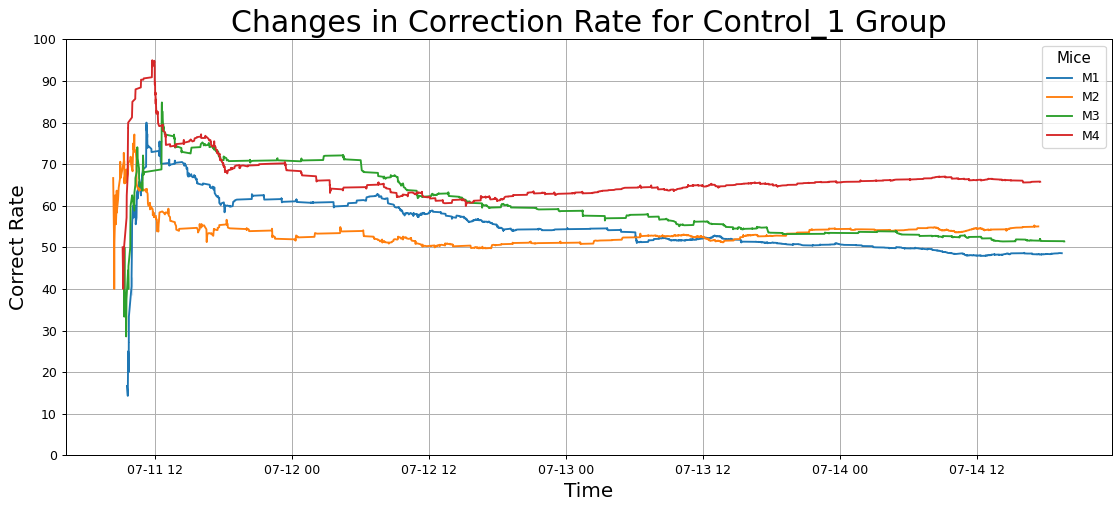

In [4]:
graph_cumulative_acc(ctrl_list[:4], 'Control_1')

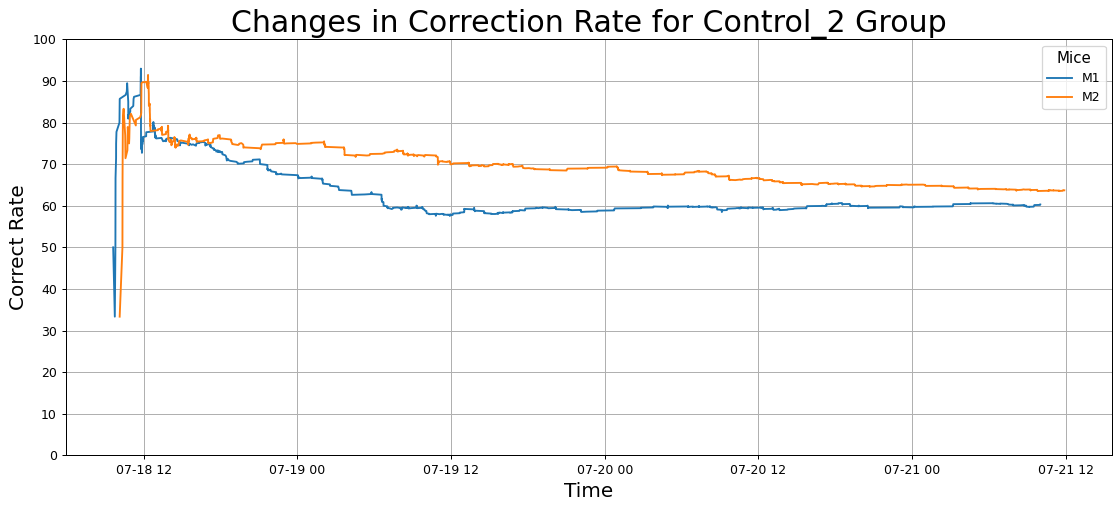

In [5]:
graph_cumulative_acc(ctrl_list[4:], 'Control_2')

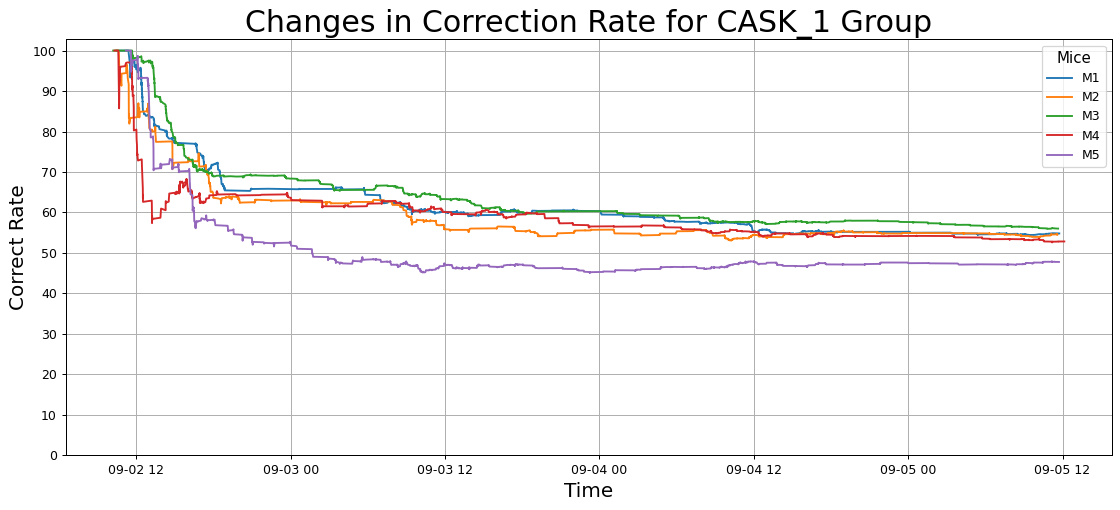

In [6]:
graph_cumulative_acc(exp_list[:5], 'CASK_1')

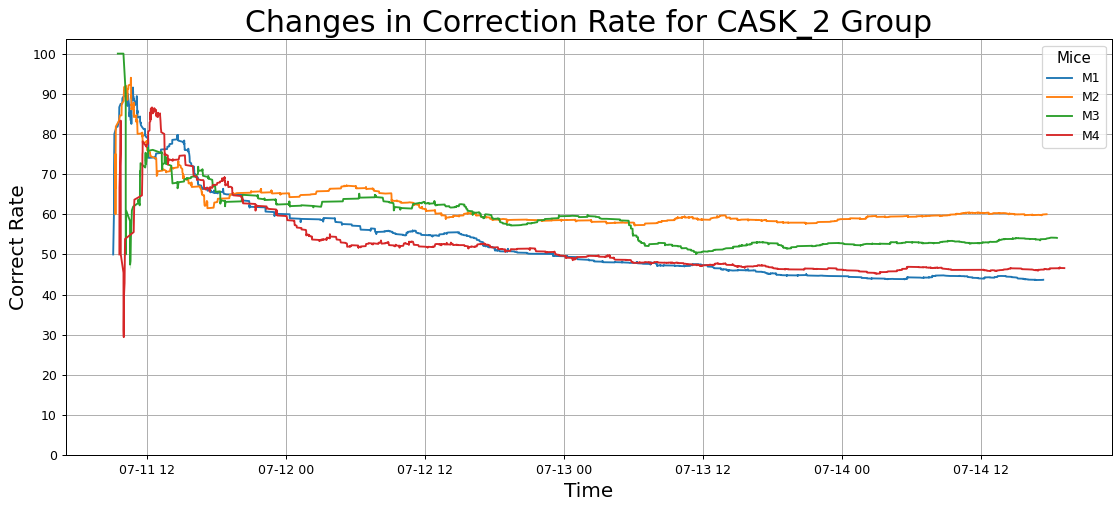

In [7]:
graph_cumulative_acc(exp_list[5:9], 'CASK_2')

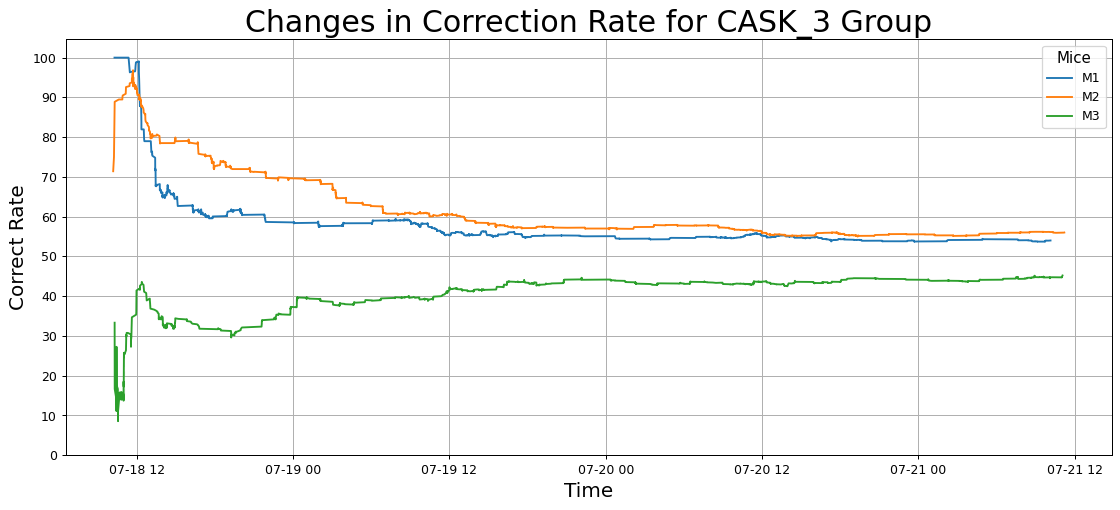

In [20]:
graph_cumulative_acc(exp_list[9:12], 'CASK_3')

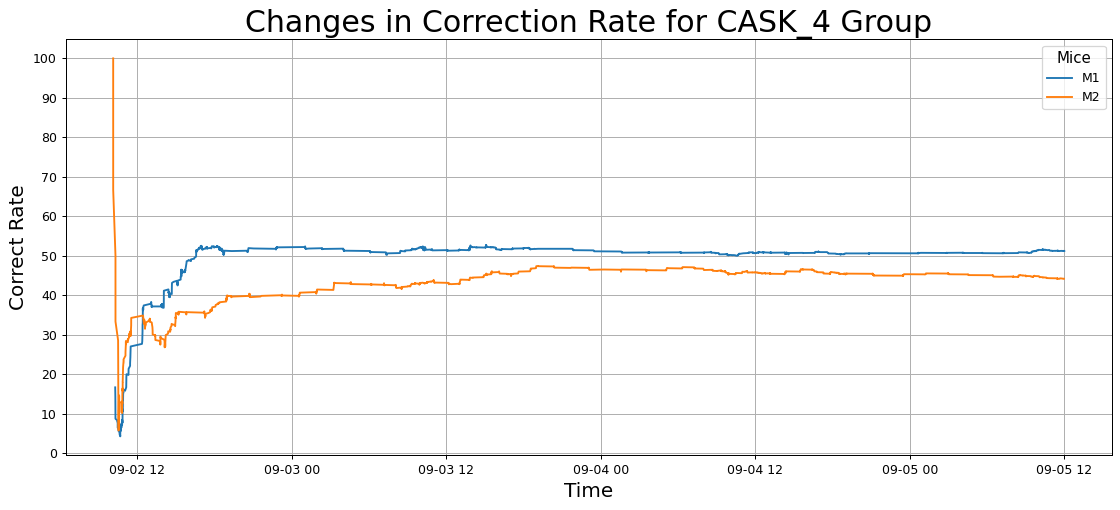

In [21]:
graph_cumulative_acc(exp_list[12:], 'CASK_4')

In [11]:
invs.perform_T_test(ctrl_ending_corr, exp_ending_corr, test_side='less')

P Value is  0.022058560456402473
Experiment group is significantly less than control group


#### Define 2D lists to store values

In [2]:
# index 0 is control, index 1 is experiment
left_rate = [[], []]
right_rate = [[], []]
ctrl = []
cask = []

## Control Group

In [4]:
for path in paths.contigency_flip_ctrl:
    df = read_csv_clean(path=path)
    rateL, rateR, overall = count_error_rate(df, overall_accuracy=True)
    left_rate[0].append(rateL)
    right_rate[0].append(rateR)
    ctrl.append(overall)

### Experiment Group

In [5]:
for path in paths.contigency_flip_cask:
    df = read_csv_clean(path=path)
    rateL, rateR, overall = count_error_rate(df, overall_accuracy=True)
    left_rate[1].append(rateL)
    right_rate[1].append(rateR)
    cask.append(overall)

In [6]:
print("Left Active Average:", left_rate)
print("Right Active Average:", right_rate)
print('Control:', ctrl)
print('CASK:', cask)

Left Active Average: [[0.49, 0.5, 0.41, 0.59, 0.57, 0.61], [0.4, 0.5, 0.42, 0.46, 0.46, 0.57, 0.57, 0.56, 0.47, 0.35, 0.55, 0.41, 0.43, 0.38]]
Right Active Average: [[0.47, 0.39, 0.45, 0.22, 0.34, 0.32], [0.48, 0.41, 0.54, 0.4, 0.38, 0.44, 0.37, 0.48, 0.4, 0.42, 0.43, 0.51, 0.47, 0.52]]
Control: [0.48, 0.45, 0.43, 0.45, 0.48, 0.51]
CASK: [0.44, 0.45, 0.48, 0.43, 0.43, 0.51, 0.48, 0.52, 0.43, 0.38, 0.5, 0.47, 0.45, 0.47]


### Graphing

In [7]:
groups = ['Control Group', 'CASK Group']

Left Average: [0.5283333333333332, 0.46642857142857136]
Right Average: [0.365, 0.44642857142857145]
Left Standard Deviation: [0.030813056395697664, 0.019684521248079442]
Right Standard Deviation: [0.0376607664995461, 0.014434663059635717]


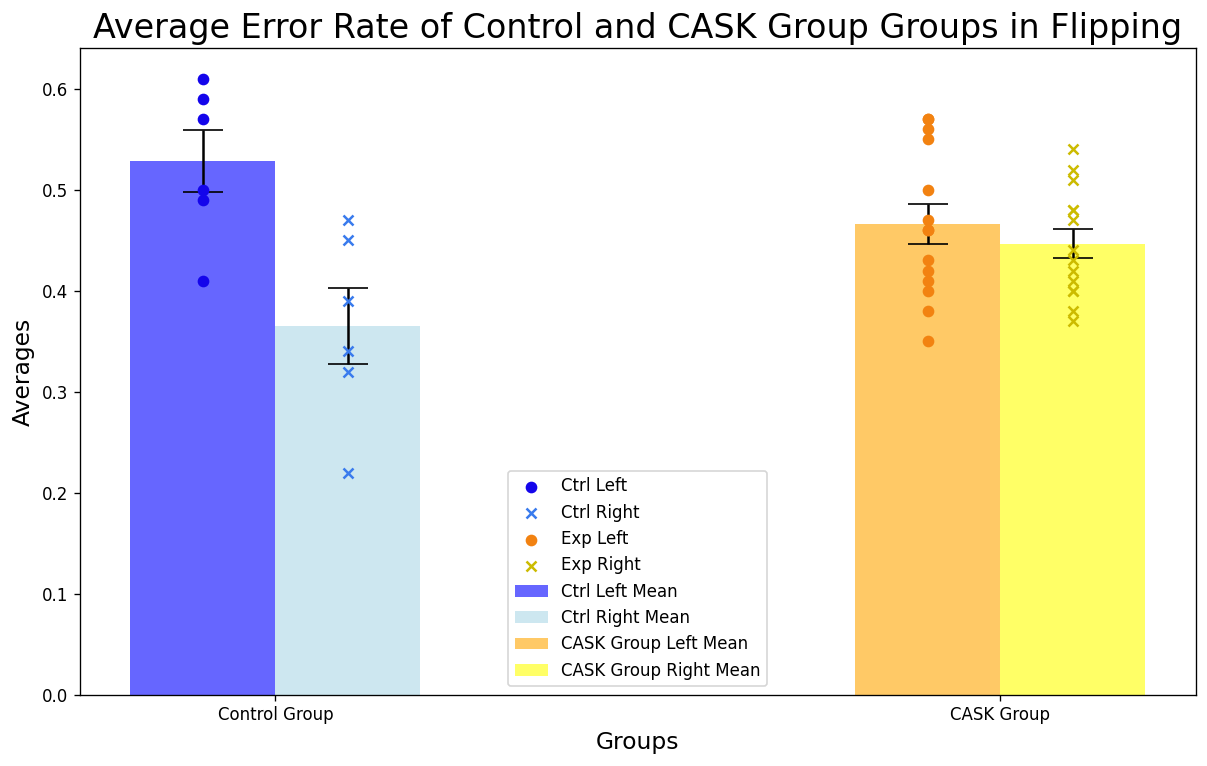

In [8]:
draw_left_right_error(left_rate, right_rate, groups=groups, 
                      bar_width=0.2, err_width=12, dpi=120, verbose=True)

Control Group Size: 6
CASK Group Size: 14
Control Group Average: 0.4666666666666666
CASK Group Average: 0.45999999999999996
Control Group Standard Deviation: 0.02875181153713043
CASK Group Standard Deviation: 0.03762159772503841


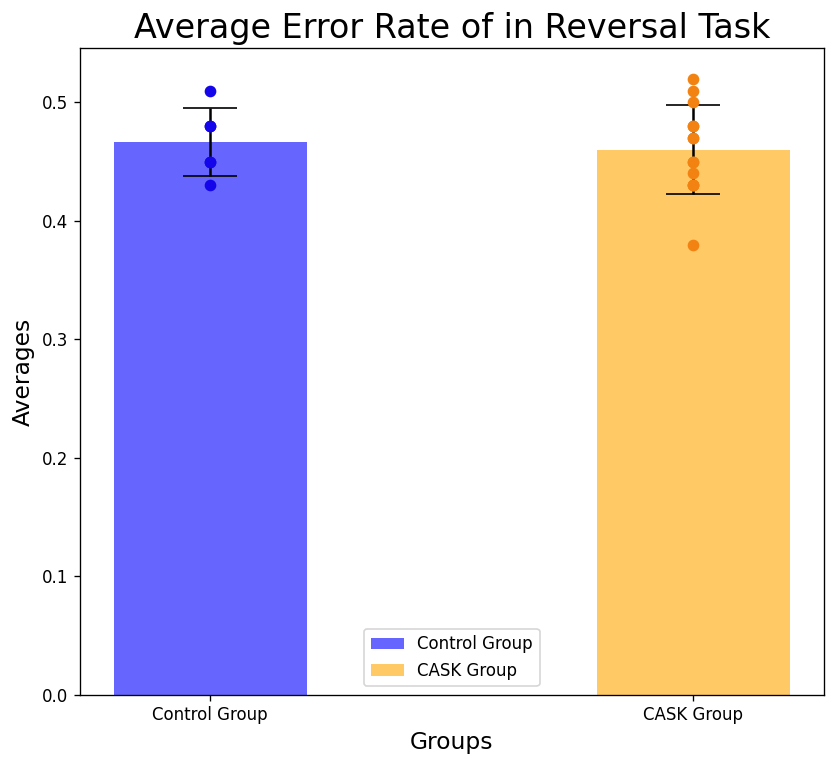

In [9]:
draw_mean_error_rate(ctrl, cask, groups, dpi=120, bar_width=0.2, err_width=16, verbose=True)

In [10]:
invs.MannWhitneyUTest(left_rate[0], right_rate[0], test_side='two-sided')

P Value is  0.008658008658008658
There is a significant difference between the two groups.


In [11]:
invs.perform_T_test(left_rate[1], left_rate[0], test_side='two-sided')

P Value is  0.10432815819181074
There is no significant difference between the two groups.


In [12]:
invs.perform_T_test(ctrl, cask, test_side='less')

P Value is  0.3519556684485454
There is no significant difference between the two groups.


* Left Active blocks seems make mice performs worse(error rate around 50%) when flipping. (First Active Poke correlation?)
* Experimental Group has no obvious difference in accuracy of left and right active poke
* Control has significant difference (Mann-whitney U test), but may due to small amount of data point?